In [1]:
import pandas as pd
from IPython.display import display, HTML
from lr.text_processing.util import pre_process_nli_df
from lr.training.util import filter_df_by_label
from lr.text_processing.transformations.wordnet import path_base_transformation_p
import numpy as np
import matplotlib.pyplot as plt


In [2]:
original_path = "data/snli/train.csv" 
transformed_path = "data/snli/train_p_h_syn_noun.csv"

df = pd.read_csv(original_path)
df = filter_df_by_label(df.dropna()).reset_index(drop=True)
pre_process_nli_df(df)

df_t = path_base_transformation_p(df, transformed_path)

n = 400 | e_n = 6.8%


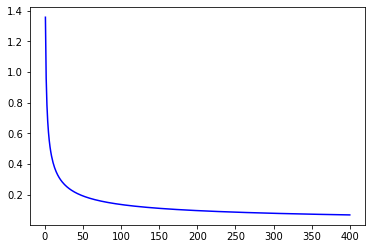

In [3]:
def e(alpha, n):
    return np.sqrt(np.log(2/alpha) / (2*n))

e95 = lambda n: e(0.05, n)
x = np.array(range(1,401))

plt.plot(x, e95(x),color="blue");
p = np.random.uniform(0.5,1)
eps = e95(x)
n = eps.argmin()
e_id = eps[n]


print("n = {} | e_n = {:.1%}".format(x[n], e_id))

In [4]:
samples = 400
good = []
bad = []
count = 0

for _ in range(samples):
    count += 1
    original = df.sample()
    id_ = original.index[0]
    print("\noriginal\n")
    display(HTML(original.to_html()))
    modified = df_t.loc[id_].to_frame().transpose()
    print()
    print("\nmodified\n")
    display(HTML(modified.to_html()))
    print("\ndecide\n")
    decision = input()
    if decision == "y":
        good.append(id_)
    elif decision =="n":
        bad.append(id_)
    else:
        break


original



,premise,hypothesis,label
483759,an acrobat entangles herself in fabric twisted in the trees above,an acrobat is practicing his moves,neutral




modified



,premise,hypothesis,label
483759,an acrobat entangles herself in cloth twisted in the trees above,an acrobat is practicing his moves,neutral



decide



 y



original



,premise,hypothesis,label
133648,a city square with a large red wall and people walking about,some people have dogs,neutral




modified



,premise,hypothesis,label
133648,a metropolis foursquare with a large red wall and people walking about,some people have dogs,neutral



decide



 n



original



,premise,hypothesis,label
292059,a person taking a picture of a crowded place,a person taking a picture of a crowded arena,neutral




modified



,premise,hypothesis,label
292059,a individual taking a image of a crowded place,a person taking a picture of a crowded arena,neutral



decide



 y



original



,premise,hypothesis,label
40004,laura bush speaking at a conference on global literacy,laura bush is speaking about farming,contradiction




modified



,premise,hypothesis,label
40004,laura shrub speaking at a conference on global literacy,laura bush is speaking about farming,contradiction



decide



 n



original



,premise,hypothesis,label
379398,people are sitting on a ledge on the side of a street the girl in the front has high heels on,the person is alone in the bathroom,contradiction




modified



,premise,hypothesis,label
379398,people are sitting on a shelf on the side of a street the girl in the front has high heels on,the person is alone in the bathroom,contradiction



decide



 y



original



,premise,hypothesis,label
227260,three people stand in front of a store with a white sofa,three people loiter in front of a store with a black sofa,contradiction




modified



,premise,hypothesis,label
227260,three people base in front of a shop with a white couch,three people loiter in front of a store with a black sofa,contradiction



decide



 y



original



,premise,hypothesis,label
119269,a man in shorts is chopping wood outside a teepee,a man in pants is chopping wood to build a cabin,contradiction




modified



,premise,hypothesis,label
119269,a adult male in shorts is chopping wood outside a tepee,a man in pants is chopping wood to build a cabin,contradiction



decide



 y



original



,premise,hypothesis,label
484817,a man smokes a cigar as he walks the city street,a person is smoking while they walk,entailment




modified



,premise,hypothesis,label
484817,a adult male smokes a cigar as he walks the metropolis street,a person is smoking while they walk,entailment



decide



 y



original



,premise,hypothesis,label
74365,there are four people in what appears to be a small blue room,four brothers are in a small room,neutral




modified



,premise,hypothesis,label
74365,there are four people in what look to be a small blue room,four brothers are in a small room,neutral



decide



 y



original



,premise,hypothesis,label
467905,man cooking up some breakfast,the man is making his favorite breakfast,neutral




modified



,premise,hypothesis,label
467905,adult male cooking up some breakfast,the man is making his favorite breakfast,neutral



decide



 y



original



,premise,hypothesis,label
65312,a woman is singing and playing guitar,a woman singing,entailment




modified



,premise,hypothesis,label
65312,a adult female is singing and playing guitar,a woman singing,entailment



decide



 y



original



,premise,hypothesis,label
90802,string band performs in restaurant,a restaurant is quiet,contradiction




modified



,premise,hypothesis,label
90802,string band performs in eatery,a restaurant is quiet,contradiction



decide



 y



original



,premise,hypothesis,label
446741,number 46 pictured in the middle of a pitch,the pitcher number is 29,contradiction




modified



,premise,hypothesis,label
446741,number 46 pictured in the center of a pitch,the pitcher number is 29,contradiction



decide



 y



original



,premise,hypothesis,label
31242,a girl looking through a large telescope on a school trip,the telescope she is looking through is very tiny,contradiction




modified



,premise,hypothesis,label
31242,a girl looking through a large scope on a school trip,the telescope she is looking through is very tiny,contradiction



decide



 y



original



,premise,hypothesis,label
193584,a man dressed for cold weather plays with a stick with his black and brown dog,a woman builds a snowman,contradiction




modified



,premise,hypothesis,label
193584,a adult male dressed for common cold conditions plays with a stick with his black and brown domestic dog,a woman builds a snowman,contradiction



decide



 y



original



,premise,hypothesis,label
539345,man in business suit presents slide show to a conference audience,a man is presenting a bunch of graphs to a bank company,neutral




modified



,premise,hypothesis,label
539345,adult male in concern suit of clothes presents microscope slide show to a conference audience,a man is presenting a bunch of graphs to a bank company,neutral



decide



 n



original



,premise,hypothesis,label
465265,a woman in a black dress with a bun in her hair reaches up on the clothesline in her bathroom for an article of clothing,a woman is washing clothes,contradiction




modified



,premise,hypothesis,label
465265,a adult female in a black frock with a roll in her hair range up on the clothesline in her bath for an article of clothing,a woman is washing clothes,contradiction



decide



 f


## CI

In [8]:
n =  count-1
g = len(good) / n
print("count = {}\n".format(count))
print("len(good) = {}\n".format(len(good)))
print("good pct = {:.3f}\n".format(g))


count = 17

len(good) = 13

good pct = 0.812



In [9]:
all_ns = [26, 21, 21, 10,
          12, 17]

all_good = [23, 19, 16, 8,
            8, 13]

assert len(all_ns) == len(all_good)

n = np.sum(all_ns)
g = np.sum(all_good)
pct = g / n

l = pct - e95(n)
u = pct + e95(n) 

print("count = {}\n".format(n))
print("good pct = {:.1%}\n".format(pct))
print("e95 = {:.2%}\n".format(e95(n)))
print("good 95% pct CI = ({:.1%}, {:.1%})\n".format(l,u))


count = 107

good pct = 81.3%

e95 = 13.13%

good 95% pct CI = (68.2%, 94.4%)



## gathering results

In [10]:
dict_ = {"data": ["SNLI", "SNLI"],
         "transformation": ["Wordnet Syn Sub P and H", "Wordnet Syn Sub P only"],
         "acceptance": ["82.2%", "{:.1%}".format(pct)],
         "lower": ["75.5%", "{:.1%}".format(l)],
         "upper":["89.5%", "{:.1%}".format(u)],
         "sample size":[400, n]}



results = pd.DataFrame(dict_)
results

,data,transformation,acceptance,lower,upper,sample size
0,SNLI,Wordnet Syn Sub P and H,82.2%,75.5%,89.5%,400
1,SNLI,Wordnet Syn Sub P only,81.3%,68.2%,94.4%,107
